### Exploring the MetaData
**Exploring the all_ids folder to understand the players and matches**

**Note** : This is just the initial exploration of the meda data , what can we expect from the data and to build objectives or the outcome which we need

In [38]:
# necessary imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

In [39]:
# import the dataset
player_ids = pd.read_csv('../data/raw/all_ids/all_players_ids.csv')

In [40]:
player_ids

,Player,Player ID
0,MaKo,4462.0
1,stax,485.0
2,Rb,488.0
3,k1Ng,771.0
4,BuZz,804.0
...,...,...
15515,N4RRATE,36245.0
15516,tomaszy,19691.0
15517,Levius,40845.0
15518,QiuYe,19531.0


In [41]:
# check the unique players
player_ids['Player'].nunique()
# according to this number there are some repeated names , lets check that with player ID

15264

In [42]:
player_ids['Player ID'].nunique()
# ohh , sadly more duplicates 

15108

we can leave this for now , as it wont affect much during the analyzing phase because its a small percentage of players , we would rather focus on the bigger picture.

In [43]:
# check mathches 
matches_games_ids = pd.read_csv('../data/raw/all_ids/all_matches_games_ids.csv')

In [44]:
matches_games_ids.head()
# okay this table contains all the tournaments information , gotta be useful

,Tournament,Tournament ID,Stage,Stage ID,Match Type,Match Type ID,Match Name,Match ID,Map,Game ID,Year
0,Valorant Champions 2021,449,Group Stage,945,Opening (D),8272.0,Vision Strikers vs FULL SENSE,51282,Haven,57948.0,2021
1,Valorant Champions 2021,449,Group Stage,945,Opening (D),8272.0,Vision Strikers vs FULL SENSE,51282,Breeze,57949.0,2021
2,Valorant Champions 2021,449,Group Stage,945,Opening (C),8268.0,Team Vikings vs Crazy Raccoon,51278,Icebox,57936.0,2021
3,Valorant Champions 2021,449,Group Stage,945,Opening (C),8268.0,Team Vikings vs Crazy Raccoon,51278,Haven,57937.0,2021
4,Valorant Champions 2021,449,Group Stage,945,Opening (D),8272.0,FNATIC vs Cloud9,51283,Icebox,57951.0,2021


<Axes: xlabel='Map', ylabel='count'>

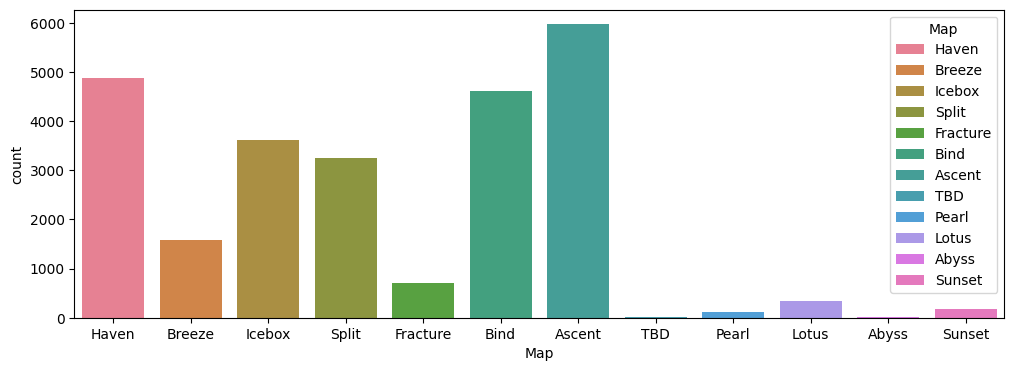

In [45]:
# just for curiosity , how many maps were played and what are most selected mapps lets see
plt.figure(figsize=(12,4))
sns.countplot(data = matches_games_ids , x = 'Map' , hue = 'Map')

Woah Ascent! , cannot be some other map overtaking this for sure
those who play valorant knows how good of a map is this

210


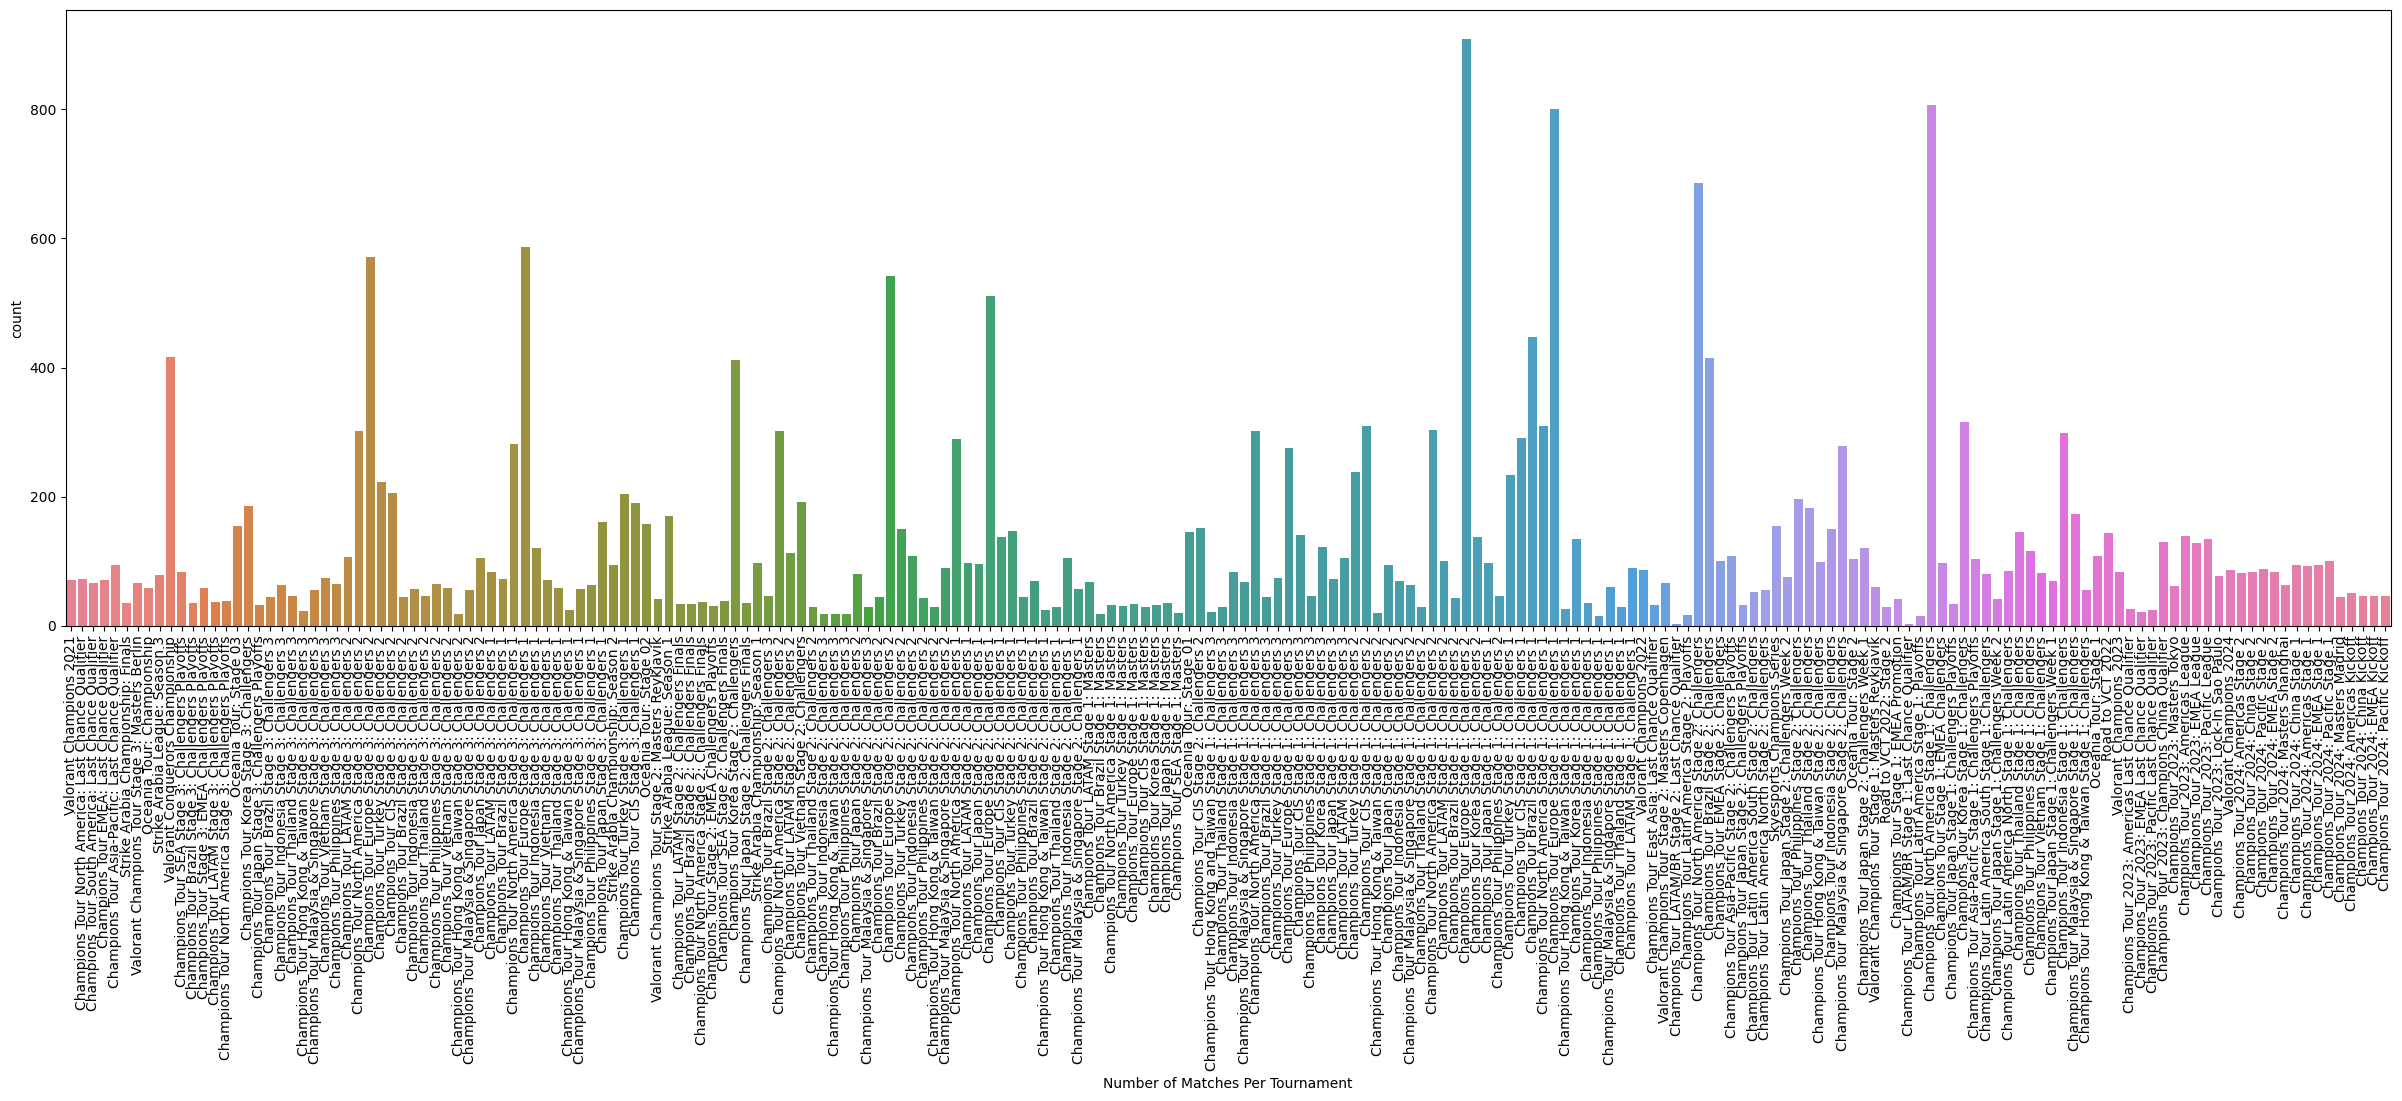

In [46]:
# lets see the tournaments
print(matches_games_ids['Tournament'].nunique())
plt.figure(figsize=(30,8))
sns.countplot(data = matches_games_ids , x = 'Tournament' , hue = 'Tournament' , legend=False)
plt.xlabel('Number of Matches Per Tournament')
plt.xticks(rotation=90 , fontsize = 10)
plt.show()

woah thats too many! <br>
this was to just get the idea of data , dont worry we will be cutting down this to individual tournaments , players and build up from there

In [47]:
# what is match type??  , lets see
print(matches_games_ids['Match Type'].nunique())
print(matches_games_ids['Match Type'].unique())

253
['Opening (D)' 'Opening (C)' 'Opening (B)' "Winner's (D)" 'Opening (A)'
 "Winner's (C)" "Winner's (B)" 'Elimination (C)' 'Elimination (B)'
 'Elimination (D)' "Winner's (A)" 'Elimination (A)' 'Decider (B)'
 'Decider (D)' 'Decider (C)' 'Decider (A)' 'Quarterfinals' 'Semifinals'
 'Grand Final' 'Upper Quarterfinals' 'Upper Semifinals' 'Lower Round 1'
 'Lower Round 2' 'Upper Final' 'Lower Round 3' 'Lower Final'
 'Upper Round 1' 'Upper Bracket Quarterfinals' 'Lower Bracket Round 1'
 'Upper Bracket Semifinals' 'Lower Bracket Round 2' 'Upper Bracket Final'
 'Lower Bracket Round 3' 'Lower Bracket Round 4' 'Lower Bracket Final'
 'Upper Finals' 'Lower Bracket Finals' 'Grand Finals' 'Group D'
 'Group Stage' 'Round of 16' 'Consolation Final' 'Group A' 'Group B'
 'Group C' 'Lower Round 4' 'Opening' 'Elimination' "Winner's" 'Decider'
 'Secondary Semifinals' '3rd Place Match' '5th-6th Decider Match'
 '7th-8th Decider Match' 'Group E' 'Group F' 'Group G' 'Group H'
 'Quarter Finals' 'Extra Round Sem

woah , thats so overwhelming<br>    
thats a lot of data to see at the first glance <br>
when we will do the analysis year wise , match wise , group wise , we will be restricting our analysis to specific matches and players <br>
there is a lot to learn , how the tournament matches are held , what format they follow and so on <br>
Since this analysis is only to get a good idea about this data , we wont be diving deep for now.<br>
But there is a lot to do , trust me alot 

### Format of VCT
found this , you can read about his more<br><br>
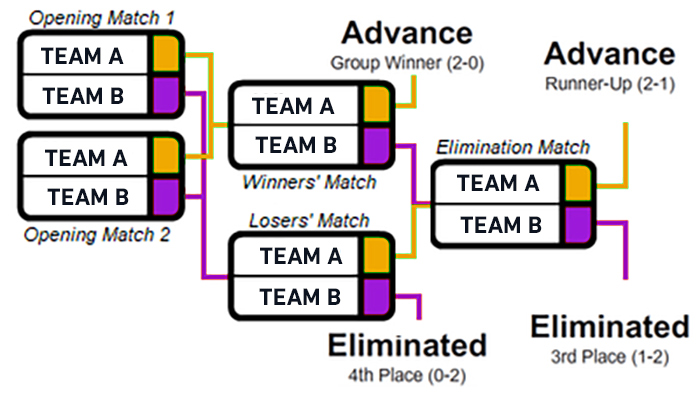

You can read more here : [https://www.pinnacle.com/en/esports-hub/betting-articles/educational/what-is-gsl-style-format/mlr2u3y7mxvataj2](https://www.pinnacle.com/en/esports-hub/betting-articles/educational/what-is-gsl-style-format/mlr2u3y7mxvataj2)

In [48]:
# lets see how many teams participated overall
teams_ids = pd.read_csv('../data/raw/all_ids/all_teams_ids.csv')

In [49]:
teams_ids.head()

,Team,Team ID
0,Vision Strikers,198.0
1,FULL SENSE,4050.0
2,Team Vikings,420.0
3,Crazy Raccoon,277.0
4,FNATIC,2593.0


In [50]:
print(teams_ids.shape)
teams_ids['Team'].nunique()

(4004, 2)


3969

thats some crazy number for teams , and few number of dupicates we can see

In [51]:
# lets see what team mappings are 
team_mappings = pd.read_csv('../data/raw/all_ids/all_teams_mapping.csv')

In [52]:
team_mappings.head()
# thats only how team names are mapped to their short hand notions 

,Abbreviated,Full Name
0,VS,Vision Strikers
1,FS,FULL SENSE
2,VKS,Team Vikings
3,CR,Carleton Ravens
4,FNC,FNATIC


In [53]:
# what is stage data is trying to convey
stages_ids = pd.read_csv('../data/raw/all_ids/all_tournaments_stages_match_types_ids.csv')

In [54]:
stages_ids.head()

,Tournament,Tournament ID,Stage,Stage ID,Match Type,Match Type ID,Year
0,Champions Tour Asia-Pacific: Last Chance Quali...,560,All Stages,NaN,All Match Types,NaN,2021
1,Champions Tour Asia-Pacific: Last Chance Quali...,560,Main Event,1096.0,Upper Round 1,NaN,2021
2,Champions Tour Asia-Pacific: Last Chance Quali...,560,Main Event,1096.0,Grand Final,7577.0,2021
3,Champions Tour Asia-Pacific: Last Chance Quali...,560,Main Event,1096.0,Lower Bracket Final,7576.0,2021
4,Champions Tour Asia-Pacific: Last Chance Quali...,560,Main Event,1096.0,Lower Bracket Round 1,7572.0,2021


one very important thing we have to check is for mising values and actually they are representing<br>
while doing the indepth analysis we will have to see how to handle those gracefully<br>

<Axes: xlabel='Year', ylabel='count'>

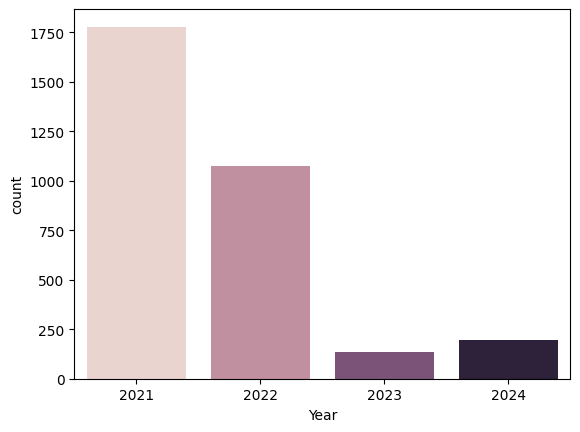

In [55]:
# how many tournament matches were held every year ??
sns.countplot(data = stages_ids , x = 'Year' , hue = 'Year' , legend= False)

hmm , why the number decreased over the year , this is a question we will try to answer when we will do the indepth analysis<br>
did the pattern change , how they select teams or how the matches are held ? <br>
can be anything we will have to find out

### Defining the Objectives

Now we stand at a place where we have okaish knowledge i would say of our data.<br>
Apart from this there is a lot of data which can be utilized <br>
agent pick rates , map pick rates , eco round information , kills , deaths , round kills , team scores , economy of the team<br>
we will try to define some objectives which we will try to fulfill 

### Objectives
1. Analyzing the winning team (see the journey of winning team across the tournament)
2. Analyzing the agent trends across map with respect to win rate
3. Analyzing the team's win rate across maps
4. Analyzing the individual performance of player across maps and entire tournament
5. Maybe Rank the players (top 10 overall tournament)

#### Machine Learning Oppurtunity
can we build something that can predict the win percentages of the particular team given the map , economy and various other parameters<br>
we can try to build this , but there is problem that the meta changes across tournaments that happened across years , like 2021, 2022 ..<br>
the players performance also change , new players , teams , maps are added. There are continues changes that are going on.

**Note** : These are some of the objectives we are keeping in mind while movind forward there can be changes in them , like adding or removing some of the objectives

**Last but not the least we will try to build a streamlit app and make notebooks and the app as interactive as possible by adding images video links of matches so that we can try and analyze the matches as closely as possible**